# Regressor with pytorch
[参考链接](https://morvanzhou.github.io/tutorials/machine-learning/torch/3-01-regression/)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

# 造数据

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  

pytorch用法去官方文档查，[unsqueeze用法](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze)

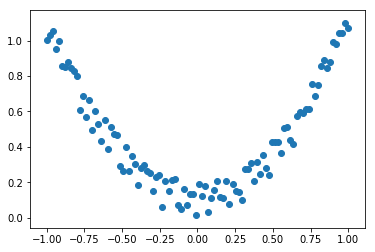

In [3]:
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 搭建神经网络

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
        

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x


In [5]:
net = Net(1,10,1)

In [6]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [8]:
loss_func = torch.nn.MSELoss()

In [9]:
plt.ion()

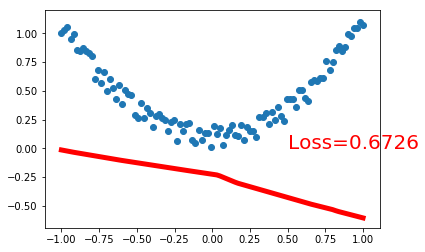

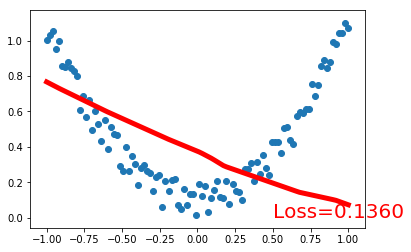

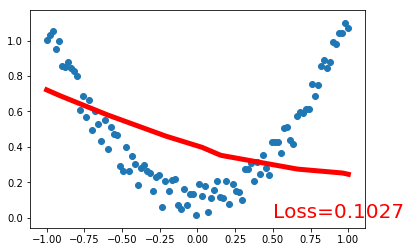

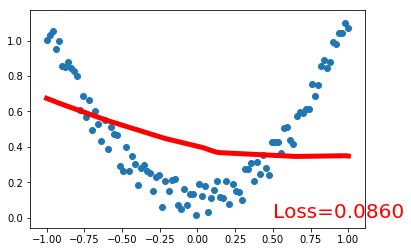

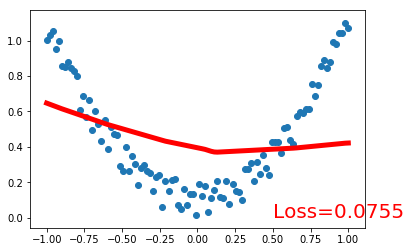

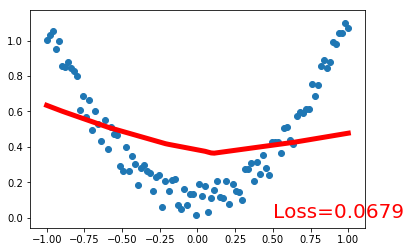

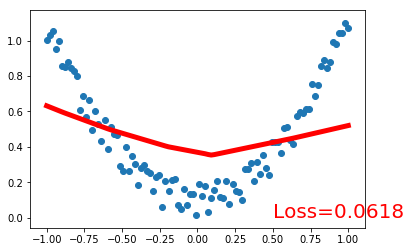

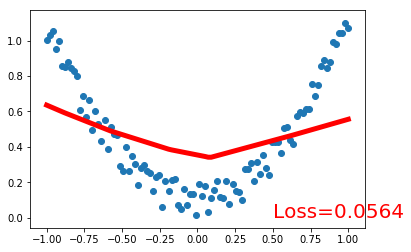

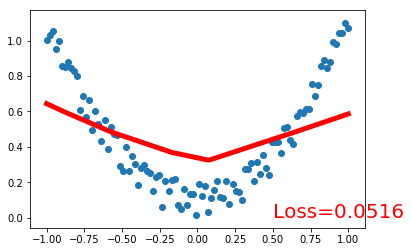

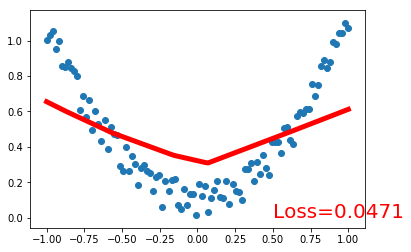

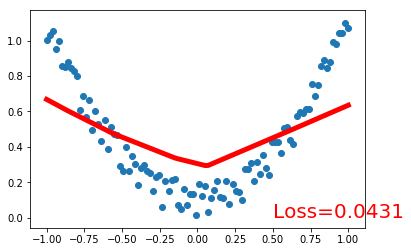

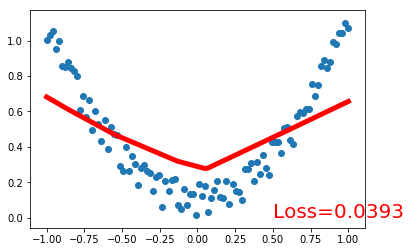

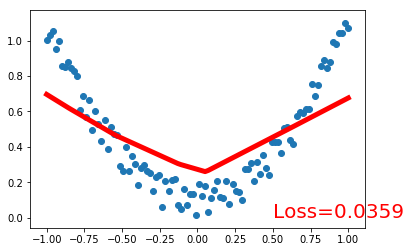

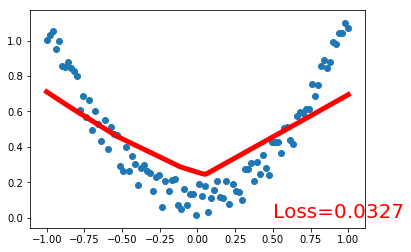

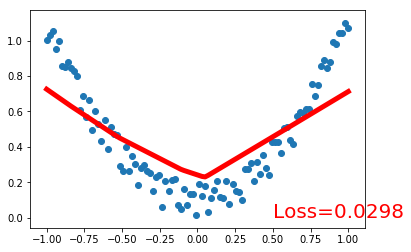

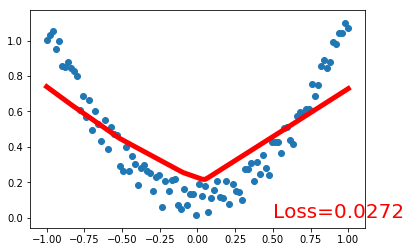

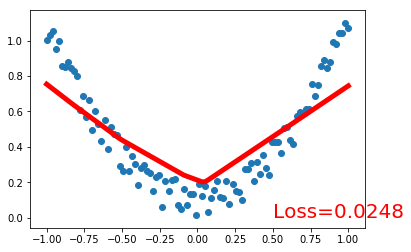

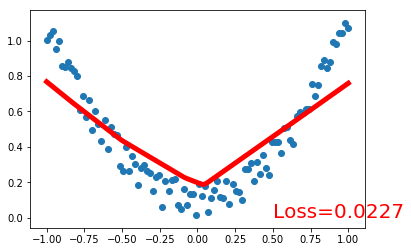

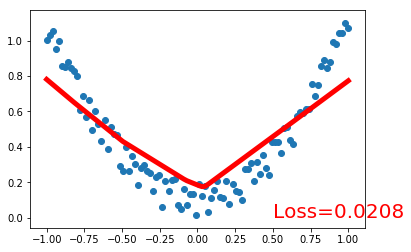

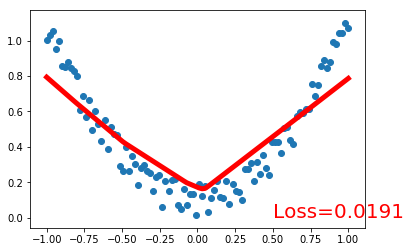

In [10]:
for i in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()# 清空上一步的残余更新参数值
    loss.backward()# 误差反向传播, 计算参数更新值
    optimizer.step()# 将参数更新值施加到 net 的 parameters 上
    if i % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
    
    
    
    